# **Assignment 2**

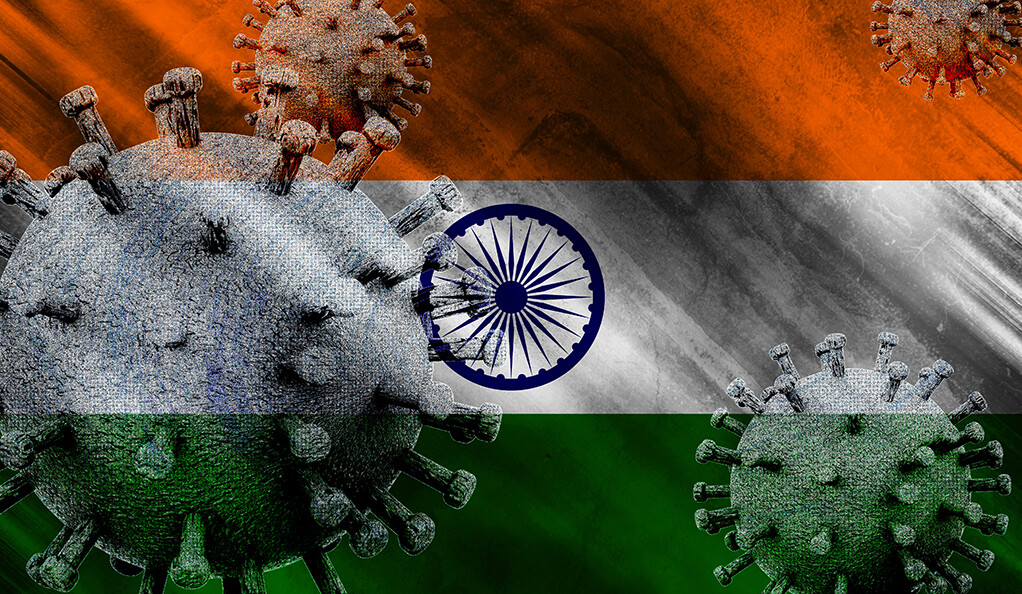

## EDA of Latest Covid-19 India Statewise Data

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

### Loading Dataset

It is good to make a copy of original dataset

In [ ]:
loadedCSV = pd.read_csv("../input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv")
dfCSV = loadedCSV.copy()
dfCSV.head()

### Data Exploration

In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

– the shape of the dataset

– info of the dataset

– summary of the dataset

1. The head function will tell you the top records in the
data set. By default, python shows you only the top 5 records.
2. The shape attribute tells us a number of observations 
and variables we have in the data set. It is used to check the dimension of data.

In [ ]:
dfCSV.shape # Shape of the dataset

3. info() is used to check the Information about the data and the datatypes of each respective attribute.

In [ ]:
# Information about dataset

dfCSV.info()

4. The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [ ]:
dfCSV.describe() #Statistical measurement

In [ ]:
dfCSV.columns # Getting list of all the columns

### Handling missing value

In [ ]:
dfCSV.isnull().sum() # checking for missing values

* There is no missing value so we don't need to do anything

### Handling Duplicate records

In [ ]:
dfCSV.duplicated().sum() #checking for duplicate records

* There is no duplicate record so we don't need to do anything

### Handling Outlier

In [ ]:
dfCSV.boxplot(column="Total Cases")

* We have outlier in this dataset but we will not do anything to them. It is necessary to use the outlier in this EDA.

In [ ]:
dfCSV.corr() # correlation of the data

In [ ]:
sum(dfCSV['Total Cases']) # Total cases

### Visualization Report

Now lets take a look at how the Total Cases are distributed

In [ ]:
print(dfCSV.describe())
plt.figure(figsize=(12, 11))
sns.displot(dfCSV['Total Cases'], color='g', line_kws={'lw': 3}, kde=True);

#### Variation of total cases with states

In [ ]:
sns.catplot(data=dfCSV, y="State/UTs", x="Total Cases", kind="bar", height=8, aspect=11/8)

In the above plot Maharastra has the maximum number of covid cases

In [ ]:
barFig = px.scatter(dfCSV, x="State/UTs", y="Total Cases", color="Total Cases", title="Total cases as per State")
# Rotate labels 45 degrees
barFig.update_layout(xaxis_tickangle=-90)

In [ ]:
px.line(dfCSV, x='State/UTs', y='Total Cases')

#### Variation of Active Cases

In [ ]:
px.line(dfCSV, x='State/UTs', y='Active')

#### Visualize and compare the total cases vs active cases for each state

In [ ]:
barFig = px.bar(dfCSV, y='Total Cases', x='State/UTs', color='Active', height=700, title="Active cases as per state")
# Put bar total value above bars with 2 values of precision
barFig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Rotate labels 45 degrees
barFig.update_layout(xaxis_tickangle=-45)



*   In the above plot Maharastra may have the maximum number of covid cases but Kerala has the maximum number of active cases.



In [ ]:
sns.relplot(x='Total Cases',y='Active',data=dfCSV, hue= 'State/UTs')

In [ ]:
barFig = px.scatter(dfCSV, x="State/UTs", y="Total Cases", color="Active", title="Active Cases as per State")
# Rotate labels 45 degrees
barFig.update_layout(xaxis_tickangle=-90)

In [ ]:
px.scatter_3d(dfCSV, x='State/UTs', z='Total Cases', y='Active', color = 'Active', width=700, height=600)



*   In the above 3D plot Maharastra may have the maximum number of covid cases but Kerala has the maximum number of active cases.



#### Death ratio is the major thing in concern and number of deaths don't give us a clear picture about the ratio. So Let us have a look at it.

In [ ]:
px.bar_polar(dfCSV, r="Death Ratio (%)", theta="State/UTs", color="Deaths",
              title="Deaths vs Death Ratio Visualisation"
            )

In [ ]:
barFig = px.bar(dfCSV, y='Death Ratio (%)', x='State/UTs', color='Deaths', height=700)
# Put bar total value above bars with 2 values of precision
barFig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Rotate labels 45 degrees
barFig.update_layout(xaxis_tickangle=-45)

#### Active Ratio and total Active cases

In [ ]:
px.bar_polar(dfCSV, r="Active Ratio (%)", theta="State/UTs", color="Active",
                   title="Active vs Active Ratio Visualization"
                  )

In [ ]:
barFig = px.bar(dfCSV, y='Active Ratio (%)', x='State/UTs', color='Active', height=700)
# Put bar total value above bars with 2 values of precision
barFig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Rotate labels 45 degrees
barFig.update_layout(xaxis_tickangle=-45)

#### Discharge Ratio and total Discharged

In [ ]:
px.bar_polar(dfCSV, r="Discharge Ratio (%)", theta="State/UTs", color="Discharged",
                   title="Discharged vs Discharge Ratio Visualization"
                  )

In [ ]:
barFig = px.bar(dfCSV, y='Discharge Ratio (%)', x='State/UTs', color='Discharged', height=700)
# Put bar total value above bars with 2 values of precision
barFig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Rotate labels 45 degrees
barFig.update_layout(xaxis_tickangle=-45)

#### How many got discharged among Total Cases

In [ ]:
barFig = px.scatter(dfCSV, x="State/UTs", y="Total Cases", color="Discharge Ratio (%)")
# Rotate labels 45 degrees
barFig.update_layout(xaxis_tickangle=-90)

#### Visualizing each states on the basis of Active cases, Discharge Ratio and Total Cases

In [ ]:
px.scatter_3d(dfCSV, x='State/UTs', z='Active', y='Discharge Ratio (%)', color ='Total Cases', width=700, height=600)

#### Above It maybe quite wrong because in some states the discharge ratio is high, the number of cases is so high that it doesn't show the overall scenario. So we will check with Active Ratio also

In [ ]:
px.scatter_3d(dfCSV, x='State/UTs', z='Active Ratio (%)', y='Discharge Ratio (%)', color ='Total Cases', width=700, height=600)

In [ ]:
px.scatter(dfCSV, x="State/UTs", y="Active Ratio (%)", color="Discharge Ratio (%)")

The increase in discharge ratio decrease in active ratio

#### Let's check for Death ratio and discharge ratio also

In [ ]:
px.scatter_3d(dfCSV, x='State/UTs', z='Death Ratio (%)', y='Discharge Ratio (%)', color ='Total Cases', width=700, height=600)

In [ ]:
px.scatter(dfCSV, x="State/UTs", y="Death Ratio (%)", color="Discharge Ratio (%)")

#### Active Vs Deaths

In [ ]:
barFig = px.scatter(dfCSV, x="State/UTs", y="Active", color="Deaths")
# Rotate labels 45 degrees
barFig.update_layout(xaxis_tickangle=-90)

#### Active Ratio VS Death Ratio

In [ ]:
barFig = px.scatter(dfCSV, x="State/UTs", y="Active Ratio (%)", color="Death Ratio (%)")
# Rotate labels 45 degrees
barFig.update_layout(xaxis_tickangle=-90)

In [ ]:
px.bar(dfCSV, x="State/UTs", y="Active Ratio (%)",
             color='Death Ratio (%)', barmode='group')

In [ ]:
#High Correlation between Total Cases and recovery(Discharged); Lowest Correlation between Active cases and Deaths
sns.heatmap(dfCSV.corr())

In [ ]:
sns.pairplot(dfCSV)

# **We found active ratio, death ratio, etc for each of the states. Also we can say that, patterns are hard to catch but yes Active Ratio is directly dependent on the Discharge Ratio.**